In this part our goal is to reach the goal state G from the starting state S without visiting the hole states H. That is, while trying to reach the goal state G from the starting state S, if the agent visits the hole states H,then it will fall into the hole and die as Figure shows:

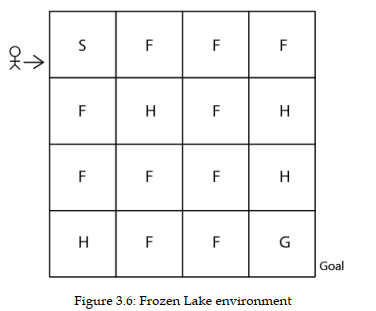

• S implies the starting state

• F implies the frozen states

• H implies the hole states

• G implies the goal state

## Solving the problem with value iteration
In the previous part, we learned about the Frozen Lake environment. we want the agent to avoid the hole states H to reach the goal state G.
How can we achieve this goal? That is, how can we reach state G from S without 
visiting H? We learned that the optimal policy tells the agent to perform the correct 
action in each state. So, if we find the optimal policy, then we can reach state G 
from S without visiting state H. Okay, how can we find the optimal policy? We 
can use the value iteration method we just learned to find the optimal policy.

Remember that all our states (S to G) will be encoded from 0 to 16 and all four 
actions—left, down, up, right—will be encoded from 0 to 3 in the Gym toolkit.

In [7]:
# First, let's import the necessary libraries:
import gym
import numpy as np

# Now, let's create the Frozen Lake environment using Gym:
env = gym.make('FrozenLake-v1')
env.reset()
env.render()

c:\Users\Lenovo\anaconda3\Lib\site-packages\gym\envs\toy_text\frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


The preceding code will display

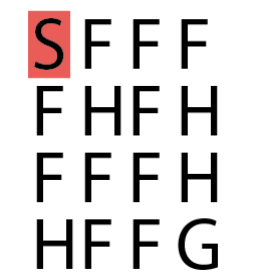

let's learn how to compute the optimal policy using the value 
iteration method.

In the value iteration method, we perform two steps:
1. Compute the optimal value function by taking the maximum over the Q 
function, that is

     


2. Extract the optimal policy from the computed optimal value function


## Computing the optimal value function
We will develop a function named `value_iteration` to iteratively compute the optimal value function by maximizing the Q function.

In [8]:
num_iterations = 1000
threshold = 1e-20
discount_factor = 1.0

def value_iteration(env):
    value_table = np.zeros(env.observation_space.n)
    for i in range(num_iterations):
        updated_value_table = np.copy(value_table)
        for state in range(env.observation_space.n):
            Q_value = []
            for action in range(env.action_space.n):
                next_states_rewards = []
                for next_sr in env.P[state][action]:
                    trans_prob, next_state, reward, _ = next_sr
                    next_states_rewards.append((trans_prob * (reward + discount_factor * value_table[next_state])))
                Q_value.append(np.sum(next_states_rewards))
            updated_value_table[state] = max(Q_value)
        if np.sum(np.fabs(updated_value_table - value_table)) <= threshold:
            print('Value-iteration converged at iteration# %d.' % (i+1))
            break
        value_table = updated_value_table
    return value_table


## Extracting the optimal policy from the optimal value function

In the previous step, we computed the optimal value function. Now, we will extract the optimal policy from the computed optimal value function.

we define a function called extract_policy, which takes value_table as a 
parameter:

In [9]:
def extract_policy(value_table):
    policy = np.zeros(env.observation_space.n)
    for state in range(env.observation_space.n):
        Q_table = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]:
                trans_prob, next_state, reward, _ = next_sr
                Q_table[action] += (trans_prob * (reward + discount_factor * value_table[next_state]))
        policy[state] = np.argmax(Q_table)
    return policy


## Putting it all together

We learned that in the Frozen Lake environment, our goal is to find the optimal 
policy that selects the correct action in each state so that we can reach state G from 
state A without visiting the hole states.
First, we compute the optimal value function using our value_iteration function by 
passing our Frozen Lake environment as the parameter:

In [10]:
optimal_value_function = value_iteration(env)

Next, we extract the optimal policy from the optimal value function using our 
extract_policy function:

In [11]:
optimal_policy = extract_policy(optimal_value_function)
print(optimal_policy)

[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]
